In [1]:
import requests
url ='https://openapi.twse.com.tw/v1/exchangeReport/STOCK_DAY_AVG_ALL'
res = requests.get(url)
res


<Response [200]>

In [3]:
import json

jsondata = json.loads(res.text)
jsondata


[{'Code': '0050',
  'Name': '元大台灣50',
  'ClosingPrice': '183.00',
  'MonthlyAveragePrice': '178.06'},
 {'Code': '0051',
  'Name': '元大中型100',
  'ClosingPrice': '81.35',
  'MonthlyAveragePrice': '79.12'},
 {'Code': '0052',
  'Name': '富邦科技',
  'ClosingPrice': '179.20',
  'MonthlyAveragePrice': '173.91'},
 {'Code': '0053',
  'Name': '元大電子',
  'ClosingPrice': '98.45',
  'MonthlyAveragePrice': '95.81'},
 {'Code': '0055',
  'Name': '元大MSCI金融',
  'ClosingPrice': '28.90',
  'MonthlyAveragePrice': '28.39'},
 {'Code': '0056',
  'Name': '元大高股息',
  'ClosingPrice': '38.99',
  'MonthlyAveragePrice': '38.04'},
 {'Code': '0057',
  'Name': '富邦摩台',
  'ClosingPrice': '134.75',
  'MonthlyAveragePrice': '131.78'},
 {'Code': '0061',
  'Name': '元大寶滬深',
  'ClosingPrice': '16.41',
  'MonthlyAveragePrice': '16.67'},
 {'Code': '006203',
  'Name': '元大MSCI台灣',
  'ClosingPrice': '86.30',
  'MonthlyAveragePrice': '84.03'},
 {'Code': '006204',
  'Name': '永豐臺灣加權',
  'ClosingPrice': '112.65',
  'MonthlyAveragePrice': '1

In [4]:
# 引入pandas庫
import pandas as pd  
# 將JSON數據轉換為DataFrame
df = pd.DataFrame(jsondata)
# 將"Code"列設置為索引
df.set_index("Code", inplace=True)
# 將空字符串替換為'0'
df.replace('', '0', inplace=True)
# 將除了"Name"列以外的所有列轉換為浮點數
df[df.columns.difference(['Name'])] = df[df.columns.difference(['Name'])].astype(float)
# 顯示DataFrame
df


,Name,ClosingPrice,MonthlyAveragePrice
Code,,,
0050,元大台灣50,183.00,178.06
0051,元大中型100,81.35,79.12
0052,富邦科技,179.20,173.91
0053,元大電子,98.45,95.81
0055,元大MSCI金融,28.90,28.39
...,...,...,...
9944,新麗,20.80,21.20
9945,潤泰新,48.65,48.24
9946,三發地產,37.60,38.93


In [9]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial Unicode Ms'] # 修改中文字體
plt.rcParams['axes.unicode_minus'] = False # 顯示負號


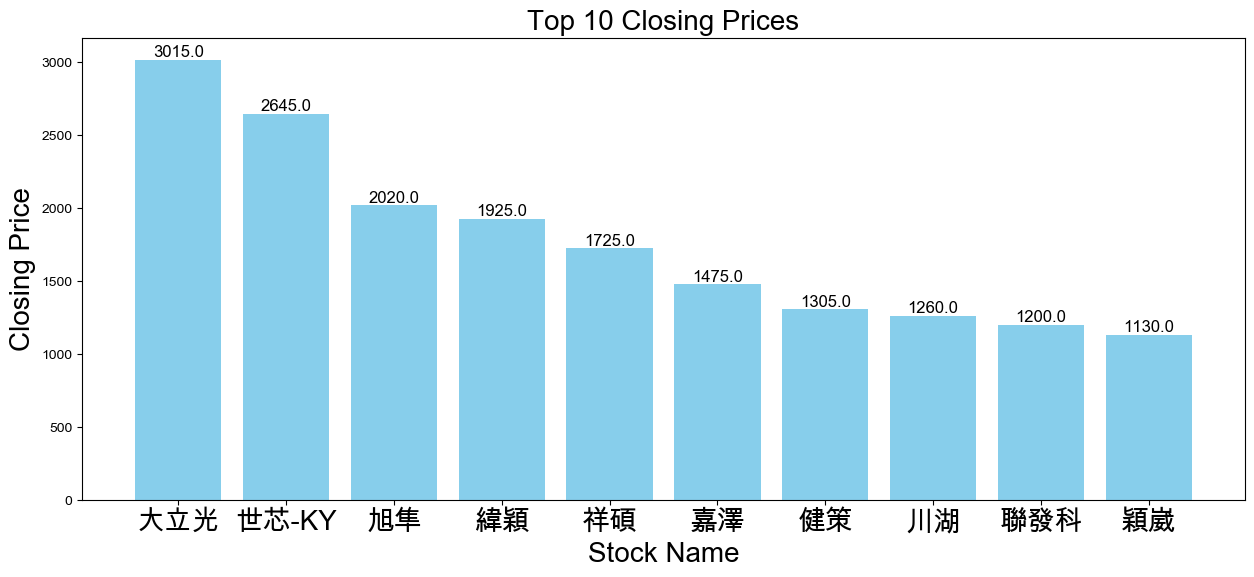

In [10]:
# 按收盤價排序並選取前10大收盤價的股票
top10_closing = df.nlargest(10, 'ClosingPrice')

# 視覺化
plt.figure(figsize=(15, 6))
bars = plt.bar(top10_closing['Name'], top10_closing['ClosingPrice'], color='skyblue')
plt.title('Top 10 Closing Prices',fontsize=20)
plt.xlabel('Stock Name',fontsize=20)
plt.ylabel('Closing Price',fontsize=20)
plt.xticks(fontsize=20)
# 在每個條形圖上顯示對應的股價
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=12)

plt.show()
